In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = [[[i+j] for i in range(5)] for j in range(100)]

X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

In [4]:
y=[(i+5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

In [5]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

In [7]:
from tensorflow.keras import models, layers

model_1 = models.Sequential(name = 'SimpleRNN_1')
model_1.add(layers.SimpleRNN(3,
                             input_shape = (5,1),
                             return_sequences = False))
model_1.add(layers.Dense(1))

model_1.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_1.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [10]:
Hist_1 = model_1.fit(X_train, y_train,
                     epochs=100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 0s 8ms/step - loss: 3826.5200 - accuracy: 0.0000e+00 - val_loss: 3779.5203 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 3822.2141 - accuracy: 0.0000e+00 - val_loss: 3775.1555 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 3817.8542 - accuracy: 0.0000e+00 - val_loss: 3770.8391 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 3813.7097 - accuracy: 0.0000e+00 - val_loss: 3766.4343 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 3809.3911 - accuracy: 0.0000e+00 - val_loss: 3762.0894 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 3805.1802 - accuracy: 0.0000e+00 - val_loss: 3757.7117 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - los

In [11]:
y_hat = model_1.predict(X_test)

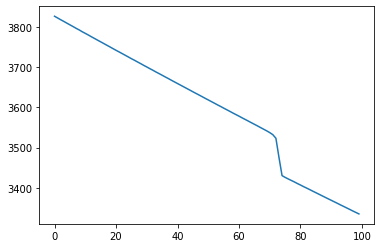

In [12]:
plt.plot(Hist_1.history['loss'])
plt.show()

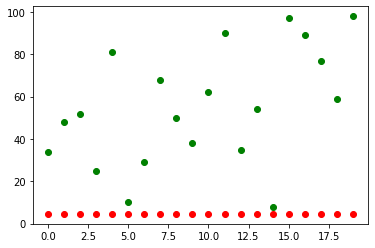

In [13]:
plt.scatter(range(20), y_test, c='g')
plt.scatter(range(20), y_hat, c='r')
plt.show()

# SimpleRNN - with Normalization

In [15]:
X = [[[i+j] for i in range(5)] for j in range(100)]
y=[(i+5) for i in range(100)]

X = (X -np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

In [16]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

In [18]:
from tensorflow.keras import models, layers

model_2 = models.Sequential(name = 'SimpleRNN_2')
model_2.add(layers.SimpleRNN(3,
                             input_shape = (None,1),
                             return_sequences = False))
model_2.add(layers.Dense(1))

model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_2.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [20]:
Hist_2 = model_2.fit(X_train, y_train,
                     epochs=100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 0.0195 - accuracy: 0.0250 - val_loss: 0.0144 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0143 - accuracy: 0.0250 - val_loss: 0.0111 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 0.0250 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0092 - accuracy: 0.0250 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 0.0250 - val_loss: 0.0070 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 0.0250 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.0250 - val_loss: 0.0051 - val_accur

In [21]:
y_hat = model_2.predict(X_test)

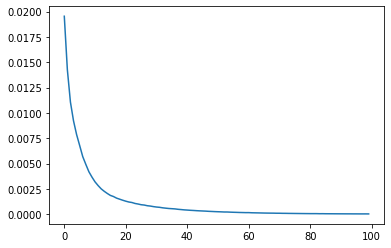

In [22]:
plt.plot(Hist_2.history['loss'])
plt.show()

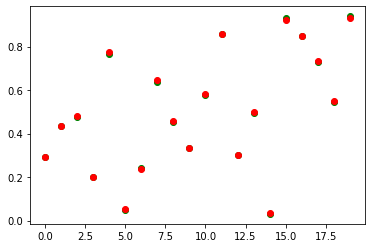

In [23]:
plt.scatter(range(20), y_test, c='g')
plt.scatter(range(20), y_hat, c='r')
plt.show()

# Stacked_SimpleRNN

In [24]:
from tensorflow.keras import models, layers

model_3 = models.Sequential(name = 'Stacked_RNN')
model_3.add(layers.SimpleRNN(3,
                             input_shape = (None,1),
                             return_sequences = True))

model_3.add(layers.SimpleRNN(3,
                             input_shape = (None,1),
                             return_sequences = False))

model_3.add(layers.Dense(1))

model_3.summary()

Model: "Stacked_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 3)           15        
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_3.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [26]:
Hist_3 = model_3.fit(X_train, y_train,
                     epochs=100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 38ms/step - loss: 1.9474 - accuracy: 0.0125 - val_loss: 1.8554 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 1.7088 - accuracy: 0.0125 - val_loss: 1.6021 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 1.4644 - accuracy: 0.0125 - val_loss: 1.3671 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 1.2423 - accuracy: 0.0125 - val_loss: 1.1476 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 1.0428 - accuracy: 0.0125 - val_loss: 0.9475 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8665 - accuracy: 0.0125 - val_loss: 0.7715 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7134 - accuracy: 0.0000e+00 - val_loss: 0.6233 - val_a

In [27]:
y_hat = model_3.predict(X_test)

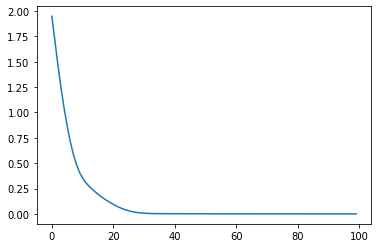

In [28]:
plt.plot(Hist_3.history['loss'])
plt.show()

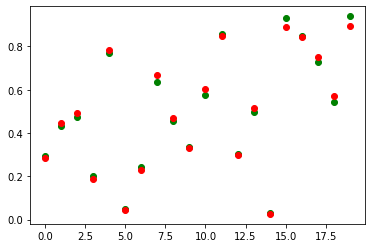

In [29]:
plt.scatter(range(20), y_test, c='g')
plt.scatter(range(20), y_hat, c='r')
plt.show()

# 'return_sequences' Output_Options

In [30]:
X = [[[i+j] for i in range(5)] for j in range(100)]
y=[(i+5) for i in range(100)]

In [31]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

In [33]:
X_test[0].reshape(1,5,1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

In [34]:
from tensorflow.keras import models, layers

model_False = models.Sequential()
model_False.add(layers.SimpleRNN(1,
                             input_shape = (5,1),
                             return_sequences = False))

model_False.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [36]:
model_False.predict(X_test[0].reshape(1,5,1))

array([[1.]], dtype=float32)

In [37]:
from tensorflow.keras import models, layers

model_False = models.Sequential()
model_False.add(layers.SimpleRNN(3,
                             input_shape = (5,1),
                             return_sequences = False))

model_False.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [38]:
model_False.predict(X_test[0].reshape(1,5,1))

array([[-1.,  1.,  1.]], dtype=float32)

In [39]:
from tensorflow.keras import models, layers

model_False = models.Sequential()
model_False.add(layers.SimpleRNN(1,
                             input_shape = (5,1),
                             return_sequences = True))

model_False.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [40]:
model_False.predict(X_test[0].reshape(1,5,1))

array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.]]], dtype=float32)

In [41]:
from tensorflow.keras import models, layers

model_False = models.Sequential()
model_False.add(layers.SimpleRNN(3,
                             input_shape = (5,1),
                             return_sequences = True))

model_False.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [42]:
model_False.predict(X_test[0].reshape(1,5,1))

array([[[ 1.        ,  1.        ,  0.3506638 ],
        [ 1.        ,  1.        , -0.77223504],
        [ 1.        ,  1.        , -0.7134678 ],
        [ 1.        ,  1.        , -0.7103115 ],
        [ 1.        ,  1.        , -0.7041674 ]]], dtype=float32)

#The End#